# **Conjunto de dados de vendas de comércio eletrônico**

##**Carga da biblioteca e do DataFrame**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Amazon Sale Report.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Renomear colunas e excluir colunas indesejadas**

In [2]:
df.rename(columns ={ 
    'Order ID':'ID do pedido',
    'Date': 'Data',
    'Fulfilment':'Cumprimento',
    'Sales Channel ':'Canal de vendas',
    'ship-service-level': 'Nível de serviço',
    'Style': 'Estilo',
    'Category': 'Categoria',
    'Size':'Tamanho',
    'Courier Status':'Status do correio',
    'currency':'Moeda',
    'Amount':'Montante',
    'ship-city':'Ship-cidade',
    'ship-state':'Ship-Estado',
    'ship-postal-code':'Ship-codigo-postal',
    'ship-country': 'Ship-país',
    'promotion-ids': 'IDs de promoção',
    'fulfilled-by':'Cumprido por'
}, inplace = True)

df.drop(columns = {'index','Unnamed: 22'}, inplace = True)

**Visão geral** 


In [3]:
df.describe()

,Qty,Montante,Ship-codigo-postal
count,128975.000000,121180.000000,128942.000000
mean,0.904431,648.561465,463966.236509
std,0.313354,281.211687,191476.764941
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


**Funções**


In [4]:
df = df.fillna('')

def l(a): 
 return a.capitalize()

def f(a):
  return pd.to_numeric(a, downcast = 'float')

**Aplicações**

In [5]:
df['Ship-cidade'] = df['Ship-cidade'].apply(l)
df['Ship-Estado'] = df['Ship-Estado'].apply(l)
df['Ship-país'] = df['Ship-país'].apply(l)
df['Montante'] = df['Montante'].apply(f)

In [6]:
df

,ID do pedido,Data,Status,Cumprimento,Canal de vendas,Nível de serviço,Estilo,SKU,Categoria,Tamanho,...,Qty,Moeda,Montante,Ship-cidade,Ship-Estado,Ship-codigo-postal,Ship-país,IDs de promoção,B2B,Cumprido por
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,Mumbai,Maharashtra,400081.0,In,,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,Bengaluru,Karnataka,560085.0,In,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,Navi mumbai,Maharashtra,410210.0,In,IN Core Free Shipping 2015/04/08 23-48-5-108,True,
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,Puducherry,Puducherry,605008.0,In,,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,Chennai,Tamil nadu,600073.0,In,,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,Hyderabad,Telangana,500013.0,In,,False,
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,Gurugram,Haryana,122004.0,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,Hyderabad,Telangana,500049.0,In,,False,
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,In,IN Core Free Shipping 2015/04/08 23-48-5-108,False,


###**Agrupamento**

In [7]:
rl = df.groupby(['Canal de vendas', 'Categoria'], sort = False).agg({'Moeda':['count'],'Montante':['sum', 'mean']}).fillna('')
rl.rename(columns = {'count':'',
                        'sum':'Total de vendas',
                        'mean':'Média de vendas '
                        },inplace = True)

rl

Moeda        Montante                 
                                     Total de vendas Média de vendas 
Canal de vendas Categoria                                            
Amazon.in       Set            50224     39204124.03       833.385571
                kurta          49826     21299546.70       455.927108
                Western Dress  15496     11216072.69        762.79058
                Top            10618      5347792.30       526.098603
                Ethnic Dress    1159       791217.66       723.895389
                Bottom           439       150667.98       358.733286
                Saree            164       123933.76       799.572645
                Blouse           922       458408.18       520.327106
Non-Amazon      Blouse             4            0.00                 
                Set               60            0.00                 
                kurta             51            0.00                 
                Western Dress      4            0.00                 
                Bottom             1            0.00                 
                Top                4            0.00                 
Amazon.in       Dupatta            3          915.00            305.0

In [8]:
rl_a = df.groupby('Categoria')['Montante'].sum()
g = pd.DataFrame(rl_a)
g

,Montante
Categoria,
Blouse,458408.18
Bottom,150667.98
Dupatta,915.00
Ethnic Dress,791217.66
Saree,123933.76
Set,39204124.03
Top,5347792.30
Western Dress,11216072.69
kurta,21299546.70


**Total de vendas por Categoria**

Text(0.5, 1.0, 'Total de vendas por categoria')

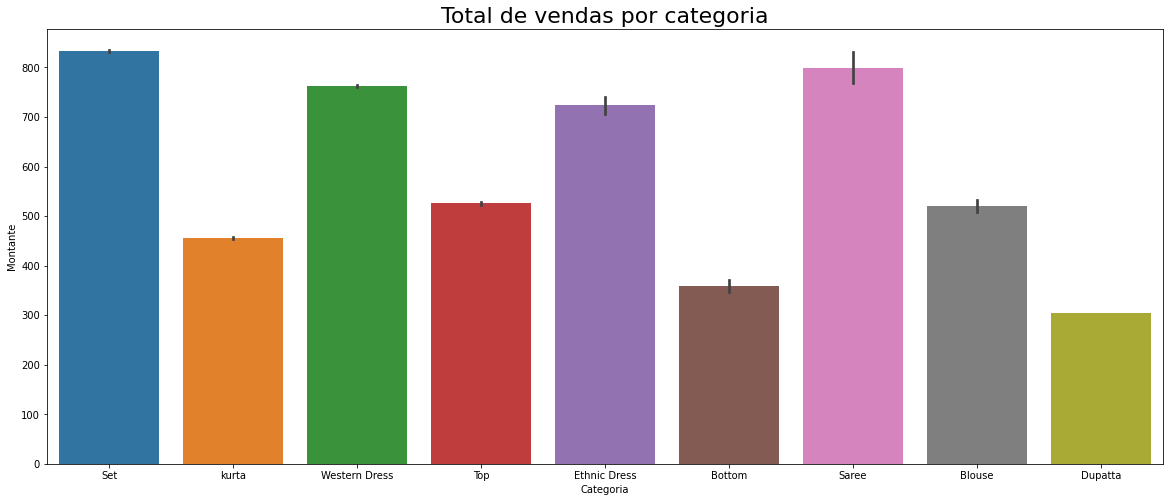

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='Categoria', y='Montante', data=df,ax=ax)
ax.set_title('Total de vendas por categoria', size = 22)

**TOP 10 - Estilos de eletronicos**


In [12]:
rl_a = df.groupby(['Estilo'])['Montante'].sum()
h = pd.DataFrame(rl_a)
h['%'] = (h['Montante'] / h['Montante'].sum()) * 100
h = h.sort_values(by = 'Montante', ascending = False)
h = h.reset_index()
h.head(10)

,Estilo,Montante,%
0,JNE3797,2933482.00,3.732513
1,J0230,1944948.48,2.474720
2,SET268,1303923.56,1.659090
3,J0341,1275322.87,1.622699
4,J0003,981973.75,1.249447
5,JNE3405,846822.36,1.077483
6,J0008,819169.96,1.042298
7,SET345,723402.79,0.920446
8,SET324,720096.82,0.916239
9,SET278,719791.48,0.915851


Text(0.5, 1.0, 'Distribuição 10 principais Estilos de eletronicos')

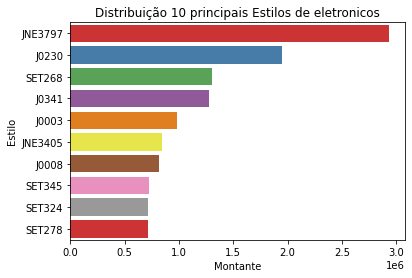

In [13]:
ax = sns.barplot(data=h.head(10), x="Montante", y="Estilo",palette="Set1")
ax.set_title("Distribuição 10 principais Estilos de eletronicos")

In [29]:
rl_b = df.groupby(['Categoria', 'Ship-Estado'])['Categoria'].count()
e = pd.DataFrame(rl_b)
e

Categoria
Categoria Ship-Estado              
Blouse    Andhra pradesh         32
          Assam                  14
          Bihar                  16
          Chandigarh              1
          Chhattisgarh            7
...                             ...
kurta     Tamil nadu           5821
          Telangana            4779
          Tripura                55
          Uttar pradesh        3457
          Uttarakhand           529

[271 rows x 1 columns]